In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# here we have imported the neccesary library

In [2]:
calhouse = pd.read_csv('cleaned_california.csv')
calhouse.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
calhouse.head()
#displays the first 5 elements
# here we have the values of the cleaned data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Since we have to calucalte and predict the value of the house we will take the median_house_value as the y variable

In [4]:
# since we are going to do training as well as the testing of the data
# we need to import some more libraires
from sklearn.model_selection import train_test_split

x = calhouse.drop(['median_house_value'], axis=1)
y = calhouse['median_house_value']
# here we have made the x and y train dataset.
# we have dropped the y train which is the median house value which will intern will be the hosue cost


In [5]:
X_train , X_test , y_train , y_test = train_test_split(x , y ,test_size=0.2)
trained_data = X_train.join(y_train)
# using this we are going to x train and y train mechanism where we have taken the size of 0.2
trained_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10942,-117.85,33.79,52.0,1963.0,430.0,1197.0,415.0,3.8929,<1H OCEAN,211000.0
9516,-120.50,37.30,29.0,1572.0,456.0,1697.0,429.0,1.7600,INLAND,63200.0
13694,-117.20,34.50,10.0,4201.0,850.0,2378.0,808.0,2.1781,INLAND,92200.0
20373,-121.77,38.76,32.0,1950.0,385.0,1145.0,363.0,2.8365,INLAND,87900.0
19064,-122.74,38.46,9.0,2268.0,594.0,1311.0,585.0,2.6607,<1H OCEAN,91500.0
...,...,...,...,...,...,...,...,...,...,...
1559,-121.98,37.74,8.0,2865.0,389.0,1376.0,417.0,7.9393,<1H OCEAN,399300.0
13965,-117.11,32.75,18.0,1943.0,587.0,1329.0,522.0,1.7696,NEAR OCEAN,103100.0
13142,-117.65,34.10,30.0,1461.0,341.0,1014.0,345.0,2.4667,INLAND,106000.0
8522,-118.37,33.86,28.0,2685.0,581.0,1243.0,529.0,4.1190,<1H OCEAN,324000.0


Here we have created a new train test and split column and made the median value.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

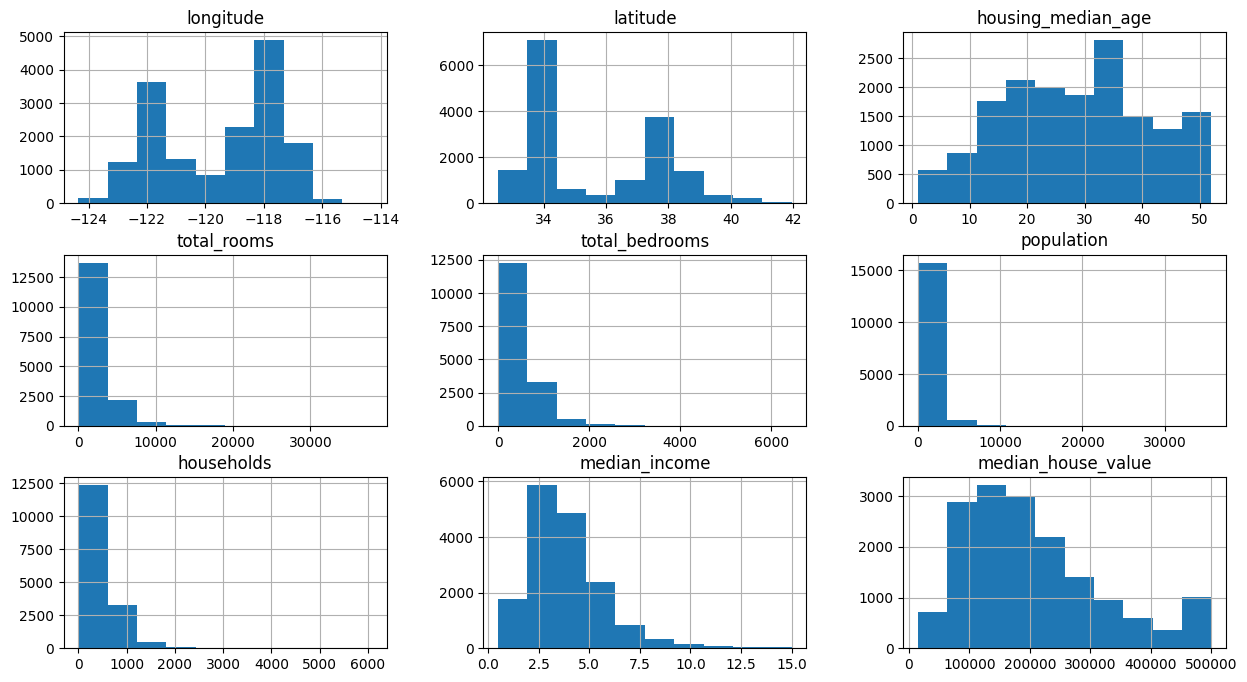

In [6]:
trained_data.hist(figsize=(15 , 8))
# Here we have made the figsize where each variable has been compared with the y trained variable

# Now that we have created a base model we are going to do some data Preprocessing


In [7]:
trained_data['total_rooms'] = np.log(trained_data['total_rooms'] +1)
trained_data['total_bedrooms'] = np.log(trained_data['total_bedrooms'] +1)
trained_data['population'] = np.log(trained_data['population'] +1)
trained_data['households'] = np.log(trained_data['households'] +1)
# this helps the transformation to normalize the skewed data.It makes it more suitbale for making linear models.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

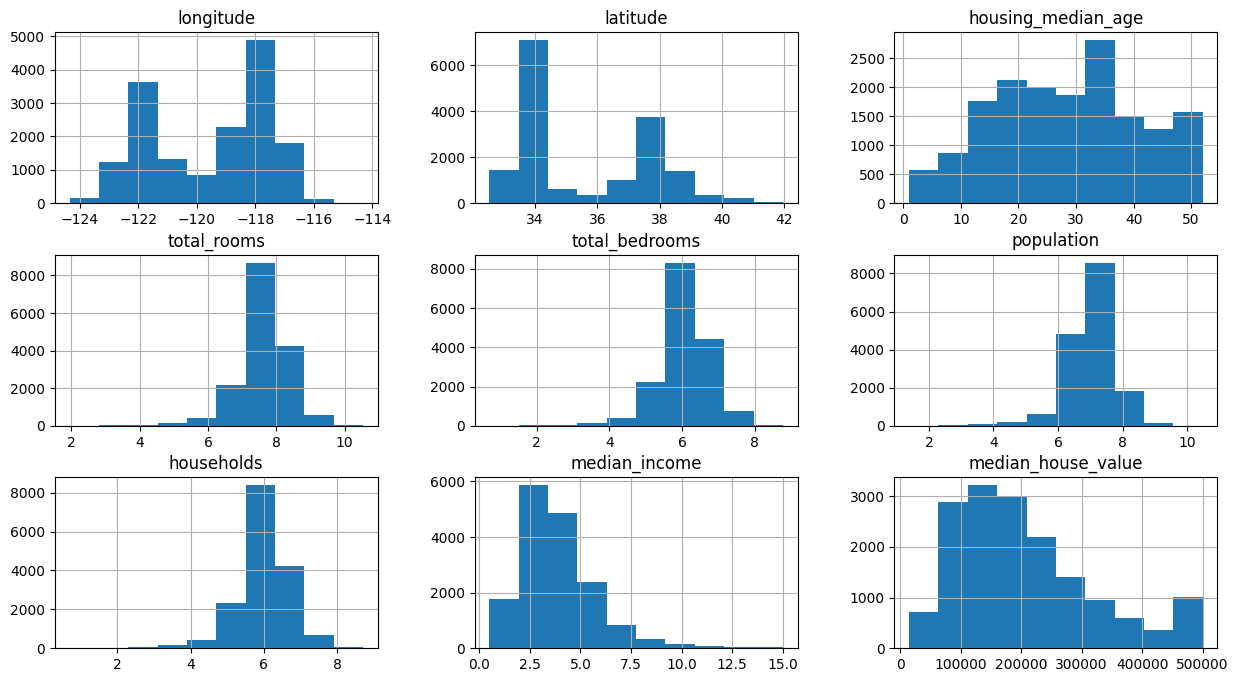

In [8]:
trained_data.hist(figsize = (15 , 8))
# this is going to print the graphs of the the given varibales.


# Here we have made the hist of the plot data

In [9]:
trained_data.columns
# here we have a coloumn called as ocean proximity which is a string value varible.

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

So we are going to take this out and instead of the values we are going to take the numbers as input

# Now we are going to make the linear regreassion plot after this

In [10]:
from sklearn.linear_model import LinearRegression

X_train , y_train = trained_data.drop(['median_house_value'],axis = 1), trained_data['median_house_value']
# here we have taken the 
reg = LinearRegression()
# loading the liner regression model and library




In [11]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()

forest_model.fit(X_train , y_train)



ValueError: could not convert string to float: '<1H OCEAN'